## Analiza danych
##### Anna Zając

**Zadanie 1**<br />
Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (LinearAlgebra.dot) i mnożenia macierzy przez wektor z użyciem operatora *.

In [3]:
function dot(x::Vector,y::Vector)
    if length(x)!=length(y)
        throw(DimensionMismatch("x and y are of different lengths"))
    end
    sum=0
   for i in eachindex(x)
        sum+=x[i]*y[i]
    end
    sum
end

dot (generic function with 1 method)

In [4]:
import Base: *
function (*)(A::Array,x::Vector)
    if ndims(A)!=2
        throw(DimensionMismatch("A should have only two dimensions"))
    end
    if size(A,2)!=length(x)
        throw(DimensionMismatch("Second dimension of array should have the same size as vector length"))
    end
    v = Vector(undef,size(A,1))
    for i in eachindex(v)
        v[i]=dot(A[i,:],x)
    end
    v
end

* (generic function with 341 methods)

**Zadanie 2**<br />
Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów. Dokonać 10 pomiarów dla każdego rozmiaru wektora.<br />
Czasy działania powinny być zapisywane do jednego pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.

In [126]:
using TimerOutputs
using CSV
using DataFrames
fname = "time.csv"
csvfile = open(fname, "w")
write(csvfile, "length,time,type\n")

x_vec = 10000:2500:100000
x_matrix = 500:100:5000


for z in x_vec
    x = rand(1:20,z[1])
    y = rand(1:20,z[1])
   for i in 1:10
        tim = @elapsed dot(x,y)
        T = (z[1] , tim , "dot")
        write(csvfile,join(T,","), "\n")
    end
end

for z in x_matrix
    x = rand(1:20,z[1])
    A = rand(1:20,z[1],z[1])
   for i in 1:10
        tim = @elapsed A*x
        T = (z[1] , tim , "*")
        write(csvfile,join(T,","), "\n")
    end
end

close(csvfile)

**Zadanie 3**<br />
Wczytać dane z w/w pliku do jednego DataFrame w języku Julia.<br />
Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego.<br />
Proszę poukładac wykresy w tabelkę za pomocą opcji layouts.<br />
Należy zadbać o staranne podpisanie osi i wykresów.

In [127]:
input="time.csv"
df=CSV.read(input, delim=",")

,length,time,type
,Int64,Float64,String
1,10000,8.701e-6,dot
2,10000,7.4e-6,dot
3,10000,6.5e-6,dot
4,10000,6.501e-6,dot
5,10000,6.499e-6,dot
6,10000,6.601e-6,dot
7,10000,6.599e-6,dot
8,10000,6.501e-6,dot
9,10000,6.601e-6,dot


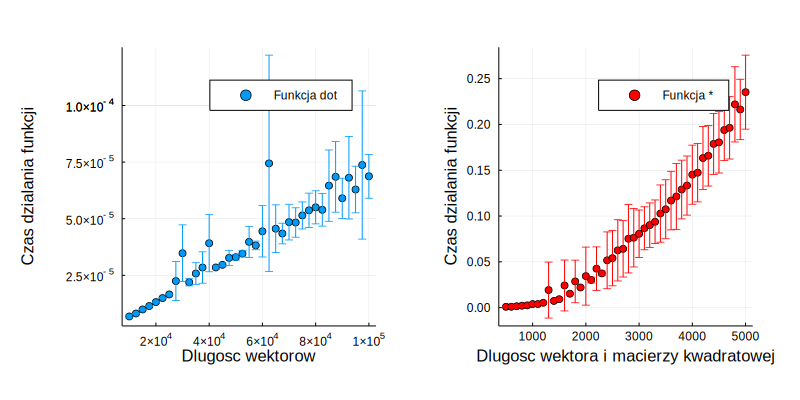

In [128]:
using Plots
using Plots.PlotMeasures
using Statistics

tmp_dot = filter(row -> row.type == "dot",df)
tmp_star = filter(row -> row.type == "*",df)

meanDot = Float64[]
meanStar = Float64[]
stdDot = Float64[]
stdStar = Float64[]
            
for z in x_vec
    tmp = filter(row -> row.length == z[1], tmp_dot)
    push!(meanDot,mean(tmp[:,2]))               
    push!(stdDot,std(tmp[:,2]))
end

for z in x_matrix
    tmp = filter(row -> row.length == z[1], tmp_star)
    push!(meanStar,mean(tmp[:,2]))
    push!(stdStar,std(tmp[:,2]))
end                    
                                                          
p1 = scatter(x_vec,meanDot,yerr=stdDot, xlabel="Dlugosc wektorow",ylabel="Czas dzialania funkcji",margin=5mm,label="Funkcja dot")
p2 = scatter(x_matrix,meanStar,yerr=stdStar,colour=:red, xlabel="Dlugosc wektora i macierzy kwadratowej",ylabel="Czas dzialania funkcji",margin=10mm,label="Funkcja *")

plot(p1,p2,layout=2)
plot!(size=(800,400))